In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000036506"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000036506
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,MACKINAC FINANCIAL CORP /MI/
Ticker,MFNC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,54.0,1.198111e+01,1.678545e+00,7.93,1.149250e+01,12.28,1.296750e+01,14.43
interest income,39.0,7.710103e+06,2.685057e+06,5175000.00,5.932000e+06,6564000.00,8.509000e+06,15828000.00
net income,54.0,1.259833e+06,1.683195e+06,-2302000.00,4.082500e+05,891000.00,1.699500e+06,8055000.00
net interest income,54.0,6.498870e+06,4.137312e+06,2679000.00,4.022250e+06,5087500.00,7.877000e+06,23527000.00
provision for loan losses,52.0,4.074615e+05,5.885415e+05,-600000.00,1.000000e+05,200000.00,5.087500e+05,2800000.00


# Plots

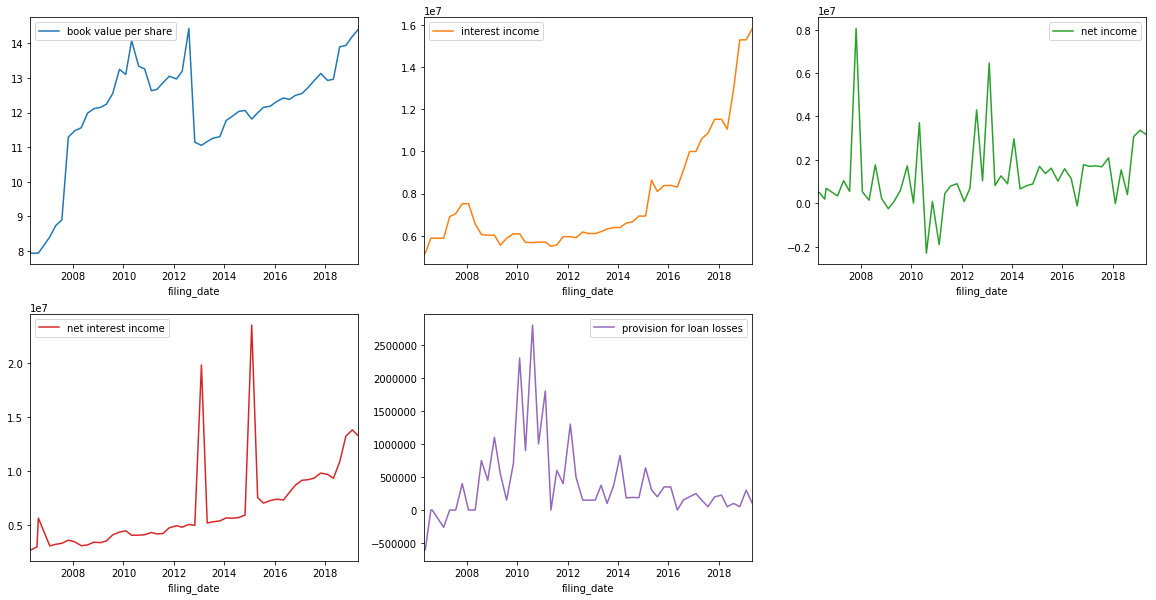

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0000036506 book value per share                            2006Q3    missing   
           interest income            2006Q3 to 2006Q4: 2 periods    missing   
           interest income                                 2007Q4    missing   
           interest income                                 2008Q4    missing   
           interest income                                 2009Q4    missing   
           interest income                                 2010Q4    missing   
           interest income                                 2011Q4    missing   
           interest income                                 2012Q4    missing   
           interest income                                 2013Q4    missing   
           interest income                                 2014Q4    missing   
           interest income                                 2015Q4    missing   
           interest income                                 2016Q4    missing   
           interest income                                 2017Q4    missing   
           interest income                                 2018Q4    missing   
           net income                                      2006Q2  duplicate   
           net income                                      2006Q3    missing   
           net interest income                             2006Q2  duplicate   
           net interest income                             2006Q3    missing   
           provision for loan losses                       2006Q3    missing   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0000036506 book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                   Duplicate period  
           net income                     Missing period  
           net interest income          Duplicate period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()